# PCA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

import pickle
from sklearn.externals import joblib

In [2]:
df_pca = pd.read_csv('./output/df_mhc.csv',sep=',',index_col=0)

In [3]:
df_pca.head()

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.5,0.0,23.0,5.52,0.0,0.0,0.0,Period1
1,0,0.0,0.0,0.5,0.0,0.0,0.5,0.5,0.5,0.5,...,0.5,0.0,0.0,0.0,0.0,2.31,0.5,0.0,0.0,Period1
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.64,0.0,0.0,0.0,Period1
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.5,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,Period1
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.5,0.0,0.0,11.38,0.0,0.0,0.0,Period1


In [4]:
cols = [col for col in df_pca.columns.values if col != "Periods"]
X = df_pca[cols]
y = df_pca["Periods"]

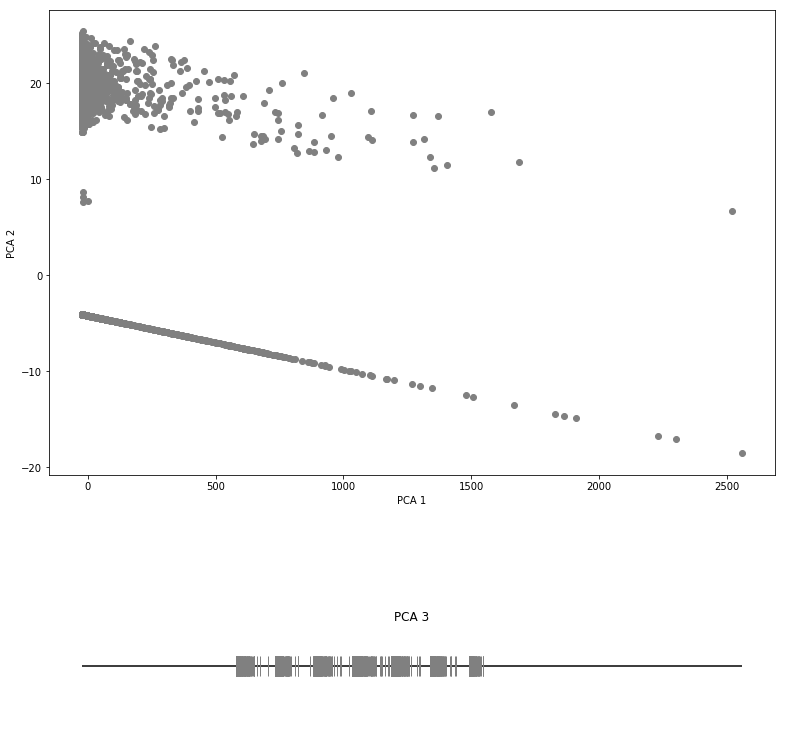

In [5]:
pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(13, 13))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1], color='grey')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20', color='grey')
ax[1].axis('off')
plt.savefig('pca1.png')
plt.show()

In [6]:
X1 = X.drop(['DayWeek'], axis=1)

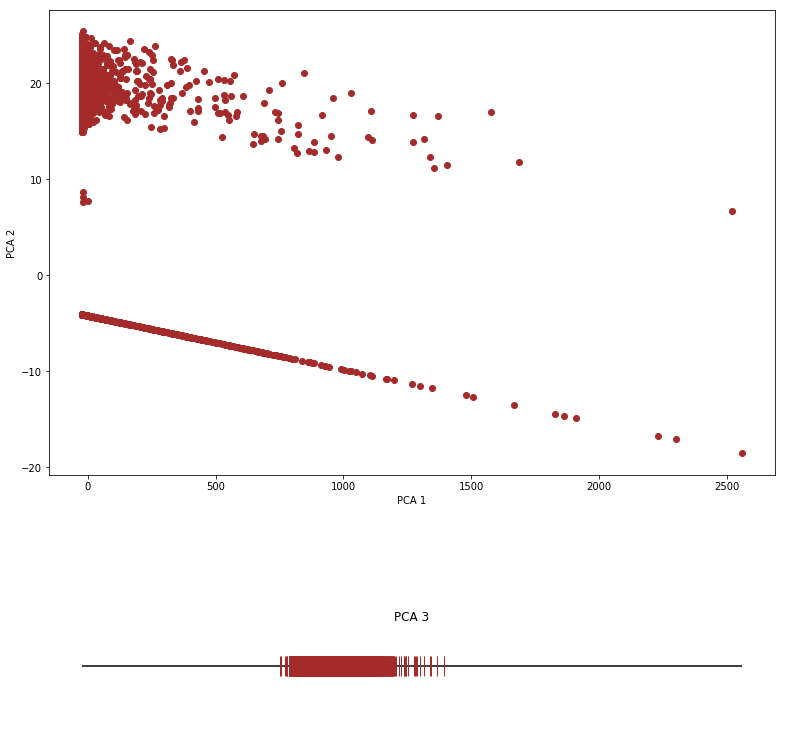

In [7]:
pca.fit(X1)
pca_X1 = pca.transform(X1)

fig = plt.figure(figsize=(13, 13))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X1[:, 0], pca_X1[:, 1], color='brown')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y1 = np.ones(X1.shape[0])
ax[1].plot(pca_X1[:, 2], y1, '|', ms='20', color='brown')
ax[1].axis('off')
plt.savefig('pca2.png')
plt.show()

### Train, test split (PCA)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.1)
display(X_test.shape, y_test.shape)

(1613, 32)

(1613,)

In [9]:
display(X_test,y_test)

array([[-2.24858695e+01, -4.10523593e+00,  1.98528243e+00, ...,
        -5.50853860e-04, -1.08352705e-03,  7.32926079e-04],
       [-2.24828579e+01, -4.09287427e+00, -2.02685759e+00, ...,
         6.20907162e-03,  5.25103603e-03,  5.25701960e-04],
       [-2.24844826e+01, -4.09934315e+00, -1.79559161e-02, ...,
         3.83514731e-01,  3.73178973e-02,  2.58845087e-03],
       ...,
       [-8.66662328e+00, -4.18498215e+00,  2.99213223e+00, ...,
        -1.27172960e-04,  5.96100010e-04,  2.24551429e-04],
       [-2.24863960e+01, -4.10761309e+00,  2.98540097e+00, ...,
        -8.15773174e-05,  5.35514967e-04,  2.38789976e-04],
       [-2.52371460e+00,  2.27884322e+01, -9.57936276e-01, ...,
        -1.16130985e-04, -8.65169957e-04, -1.21202139e-03]])

array([1., 1., 1., ..., 1., 1., 1.])

### One-hot-encoding (Clusters)

In [10]:
df_cd = df_pca.copy()

In [11]:
df_cd.Periods.value_counts(sort=False)

Period2    4032
Period1    4032
Period4    4032
Period3    4032
Name: Periods, dtype: int64

In [12]:
#FOR DROPPING
#bat_df = bat_AB.drop(['playerID','lgID','teamID'],axis=1)

### Dataframe Entrenamiento

In [13]:
X_columns = [col for col in df_cd.columns.values if col != 'Periods']
X = df_cd[X_columns]
display(X.shape,X.head(),X.columns)

(16128, 32)

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.5,0.0,23.0,5.52,0.0,0.0,0.0
1,0,0.0,0.0,0.5,0.0,0.0,0.5,0.5,0.5,0.5,...,0.5,0.5,0.0,0.0,0.0,0.0,2.31,0.5,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.64,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.5,0.5,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.5,0.5,0.0,0.0,11.38,0.0,0.0,0.0


Index(['DayWeek', 'M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007',
       'M009', 'M010', 'M011', 'M012', 'M013', 'M014', 'M015', 'M016', 'M018',
       'M020', 'M021', 'M022', 'M023', 'M024', 'M025', 'M026', 'M027', 'M028',
       'M029', 'T002', 'P001', 'D001', 'D002', 'D003'],
      dtype='object')

In [14]:
y = pd.get_dummies(data=df_cd['Periods'])
display(y.shape,y.head())

(16128, 4)

,Period1,Period2,Period3,Period4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


### Modelos

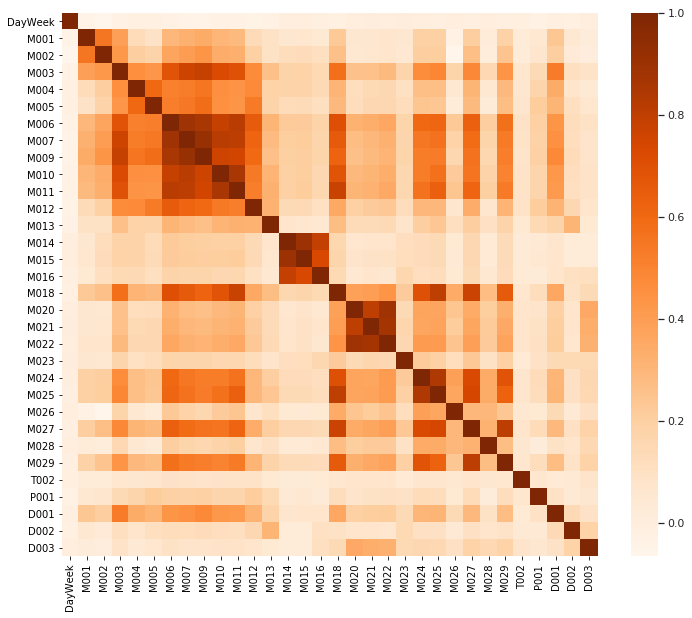

In [15]:
corr = X.corr()
figure = (12, 10)
fig, ax = pyplot.subplots(figsize=figure)
sns.set()
ax = sns.heatmap(corr,annot=False,cmap="Oranges")
X.columns.shape
plt.savefig('correlation_matrix1.png')

In [16]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]

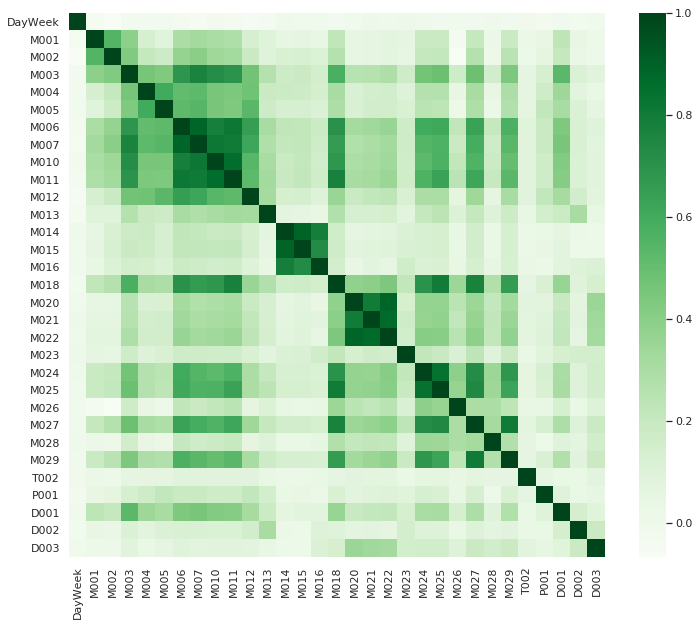

In [17]:
corr2 = X.corr()
figure = (12, 10)
fig, ax = pyplot.subplots(figsize=figure)
sns.set()
ax = sns.heatmap(corr2,annot=False,cmap="Greens")
X.columns.shape
plt.savefig('correlation_matrix2.png')

### Train, test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(12902, 31)

(12902, 4)

(3226, 31)

(3226, 4)

### cls_SVM

In [19]:
%%time
cls_svm = OneVsRestClassifier(svm.SVC(probability=True, class_weight='balanced'))
cls_svm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

CPU times: user 7min 56s, sys: 871 ms, total: 7min 57s
Wall time: 7min 57s


In [20]:
%%time
y_pred = cls_svm.predict(X_test)

CPU times: user 12.4 s, sys: 4.06 ms, total: 12.4 s
Wall time: 12.4 s


In [21]:
%%time
act_val_svm = y_test.values.argmax(axis=1)
pred_svm = cls_svm.predict(X_test).argmax(axis=1)

CPU times: user 12.1 s, sys: 0 ns, total: 12.1 s
Wall time: 12.1 s


In [22]:
def metrics_df(act_val,pred):
    precision = pd.DataFrame(precision_score(act_val,pred,average=None))
    recall = pd.DataFrame(recall_score(act_val,pred,average=None))
    f1_s = pd.DataFrame(f1_score(act_val,pred,average=None))
    metrics = pd.concat([precision, recall, f1_s], axis=1)
    metrics.index = ['Period1','Period2','Period3','Period4']
    metrics.columns = ['precision', 'recall', 'f1_score']
    metrics.columns.name = 'Periods'
    return metrics

In [23]:
metrics_df(act_val_svm,pred_svm)

Periods,precision,recall,f1_score
Period1,0.407767,0.507860,0.452342
Period2,0.292042,0.545925,0.380523
Period3,0.408081,0.251557,0.311248
Period4,0.500000,0.155529,0.237257


In [24]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('confussion_matrix.png')
    return ax

Confusion matrix, without normalization


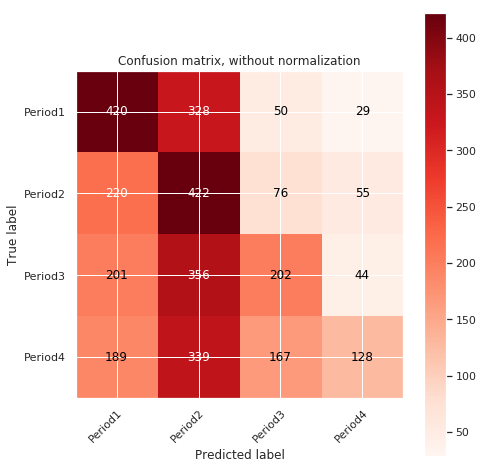

In [30]:
plot_confusion_matrix(act_val_svm,pred_svm,y.columns,cmap='Reds')

Normalized confusion matrix


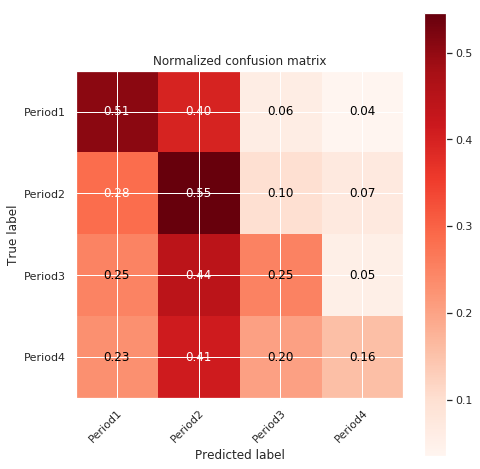

In [31]:
plot_confusion_matrix(act_val_svm,pred_svm,y.columns,cmap='Reds',normalize=True)

In [27]:
filename_svm = './output/svm_model_c.sav'
pickle.dump(cls_svm, open(filename_svm, 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.1)
display(X_test.shape, y_test.shape)